<a href="https://colab.research.google.com/github/Shaheer04/Neural-Networks/blob/main/first_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import BatchNormalization


In [2]:
dataset = pd.read_csv('housing_price_dataset.csv')

In [3]:
dataset.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [4]:
dataset

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [5]:
dataset.sum().isnull()

SquareFeet      False
Bedrooms        False
Bathrooms       False
Neighborhood    False
YearBuilt       False
Price           False
dtype: bool

In [6]:
dataset.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [7]:
X = dataset[['SquareFeet','Bedrooms','YearBuilt']]
Y = dataset[['Price']]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [9]:
X_scaled

array([[ 0.20786058,  0.44906695, -0.79175085],
       [ 0.78648033, -0.44673786, -0.26084154],
       [-0.25434018, -1.34254267, -0.74348636],
       ...,
       [ 1.6900307 ,  1.34487176, -1.12960223],
       [ 1.0245311 ,  1.34487176, -0.0677836 ],
       [-0.75476808,  1.34487176,  1.23535743]])

In [10]:
Y_scaled

array([[-0.1244012 ],
       [-0.39155083],
       [ 1.07778462],
       ...,
       [ 2.09194862],
       [ 2.04469595],
       [-0.04214206]])

In [11]:
X.head()

,SquareFeet,Bedrooms,YearBuilt
0,2126,4,1969
1,2459,3,1980
2,1860,2,1970
3,2294,2,1996
4,2130,5,2001


In [12]:
Y.head()


,Price
0,215355.283618
1,195014.221626
2,306891.012076
3,206786.787153
4,272436.239065


In [13]:
(X_train,X_test,Y_train,Y_test) = train_test_split(X_scaled,Y_scaled, test_size= 0.3, random_state=30)

In [33]:
model = Sequential([

        tf.keras.Input(shape=(3,)),
        Dense(64, activation='relu',  name="L1"),
        Dense(32, activation='relu',  name="L2"),
        Dense(16, activation='relu',  name='L3'),
        Dense(1, activation='linear', name="L4")
])

In [34]:
W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()
W3, b3 = model.get_layer("L3").get_weights()

print(f"W1 = {W1.shape}:\n",W1, f"b1 = {b1.shape}:\n",b1 )
print(f"W2 = {W2.shape}:\n",W2, f"b2 = {b2.shape}:\n",b2 )
print(f"W3 = {W3.shape}:\n",W3, f"b3 = {b3.shape}:\n",b3 )

W1 = (3, 64):
 [[ 0.08200017 -0.10278432 -0.23623969  0.03700548  0.15093184 -0.2780209
   0.28723788  0.21651655 -0.19358191  0.16312975  0.1256195   0.2638778
   0.13932219 -0.20884041  0.23419172  0.24307841 -0.07250269 -0.07349314
   0.1845763   0.01342216  0.23984301 -0.13736029  0.11323521  0.18636939
  -0.00926119 -0.04700425  0.1991114   0.07320774  0.1067      0.2052291
  -0.13347977  0.09447399 -0.00093114  0.03043732  0.11229029  0.19171512
   0.1587668   0.26747018 -0.17918915 -0.19463807  0.2726643  -0.2370163
   0.22922415 -0.00376549 -0.23855491  0.27854198  0.0763593   0.20435786
  -0.02653632  0.2190513   0.16482347  0.0173544   0.27584755 -0.16940747
   0.00680503  0.23128945 -0.17339237  0.10759079  0.13713396  0.07680166
   0.26779693  0.21843588  0.14998257 -0.20626557]
 [-0.27145085  0.09615386 -0.24898084 -0.24788216 -0.2740815  -0.0157119
   0.14894703 -0.10287008 -0.10826358  0.14156637  0.12857383 -0.27829808
  -0.26817602  0.09904608 -0.08920711 -0.2042114   

In [35]:
model.compile(
    loss= tf.keras.losses.MeanSquaredError(),
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)
    )

history = model.fit(
    X_train,Y_train,
    epochs=15,
    validation_data=(X_test,Y_test)
)

Epoch 1/15
1094/1094 [==============================] - 4s 3ms/step - loss: 0.4517 - val_loss: 0.4323
Epoch 2/15
1094/1094 [==============================] - 3s 3ms/step - loss: 0.4376 - val_loss: 0.4283
Epoch 3/15
1094/1094 [==============================] - 3s 3ms/step - loss: 0.4371 - val_loss: 0.4295
Epoch 4/15
1094/1094 [==============================] - 4s 3ms/step - loss: 0.4365 - val_loss: 0.4274
Epoch 5/15
1094/1094 [==============================] - 3s 2ms/step - loss: 0.4366 - val_loss: 0.4292
Epoch 6/15
1094/1094 [==============================] - 3s 3ms/step - loss: 0.4359 - val_loss: 0.4257
Epoch 7/15
1094/1094 [==============================] - 3s 3ms/step - loss: 0.4359 - val_loss: 0.4264
Epoch 8/15
1094/1094 [==============================] - 3s 3ms/step - loss: 0.4355 - val_loss: 0.4280
Epoch 9/15
1094/1094 [==============================] - 3s 2ms/step - loss: 0.4355 - val_loss: 0.4277
Epoch 10/15
1094/1094 [==============================] - 3s 3ms/step - loss: 0.435

<function matplotlib.pyplot.show(close=None, block=None)>

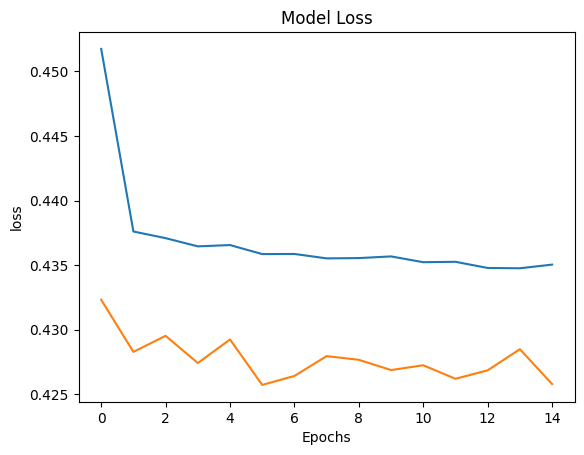

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show

In [37]:
test_loss = model.evaluate(X_test,Y_test)

469/469 [==============================] - 1s 2ms/step - loss: 0.4258


In [38]:
print(f"test_loss : {test_loss}")

test_loss : 0.4257967472076416


In [39]:
predict = model.predict(X_test)

469/469 [==============================] - 1s 1ms/step


In [40]:
y_test = np.array(Y_test).flatten()
y_predict = np.array(predict).flatten()

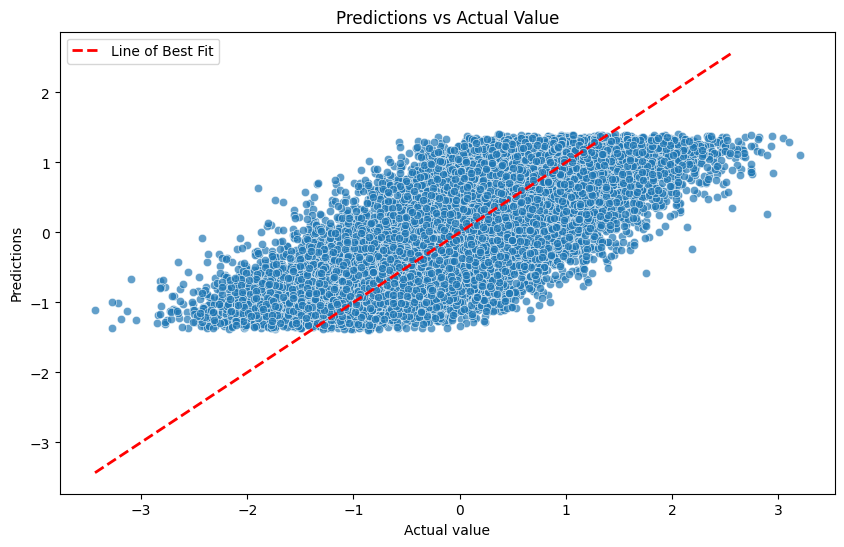

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_predict, alpha=0.7)
plt.title("Predictions vs Actual Value")
plt.xlabel("Actual value")
plt.ylabel("Predictions")


# need to learn this line later
line = np.arange(min(min(y_test), min(y_predict)), max(max(y_test), max(y_predict)), 1)
plt.plot(line, line, color='red', linestyle='--', linewidth=2, label='Line of Best Fit')

plt.legend()
plt.show()
